# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.121823e+01     7.096605e+00
 * time: 0.005081892013549805
     1     2.915374e+01     4.695465e+00
 * time: 0.014699935913085938
     2     2.709614e+01     9.768506e+00
 * time: 0.035782814025878906
     3     1.710144e+01     5.109572e+00
 * time: 0.060690879821777344
     4     1.219644e+01     1.172292e+00
 * time: 0.16406583786010742
     5     1.211781e+01     3.020706e+00
 * time: 0.17926883697509766
     6     1.052925e+01     1.560083e+00
 * time: 0.1945328712463379
     7     1.027036e+01     1.876992e+00
 * time: 0.20979785919189453
     8     9.769047e+00     1.537309e+00
 * time: 0.22504091262817383
     9     9.495618e+00     1.210439e+00
 * time: 0.24042987823486328
    10     9.299300e+00     1.231531e+00
 * time: 0.2560098171234131
    11     9.143075e+00     1.018224e+00
 * time: 0.2713589668273926
    12     9.015574e+00     5.707158e-01
 * time: 0.2829627990722656
    13     8.912154e+00     4.459904e-01
 * time:

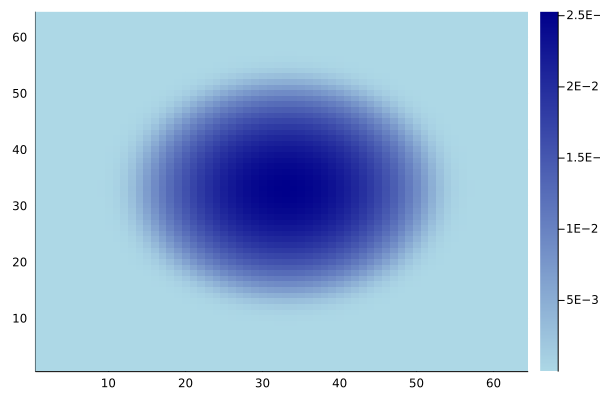

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)